## Definitions for Electromagnetic System

In [1]:
from emsystem_gpu import *

## Propagation of a Plane Electromagnetic Pulse

In [2]:
import numpy as np
import math
from numba import cuda
from IPython.display import display, HTML, Image

@cuda.jit
def fupdater(shape, x, y, z, t, Ex, Ey, Ez):
    j, k = cuda.grid(2)
    if j < shape[1] and k < shape[2] and 1e10*t < 12: # leftmost
        Ex[50,j,k] = 0
        Ey[50,j,k] = 0
        Ez[50,j,k] = 2.5e3 * math.exp(-(1e10*t - 6)**2) # gaussian pulse

# update function
def f(state, system):
    thread_ct = (32, 32)
    block_ct_y = int(math.ceil(float(system.shape[1]) / thread_ct[0]))
    block_ct_z = int(math.ceil(float(system.shape[2]) / thread_ct[1]))
    block_ct = (block_ct_y, block_ct_z)
    fupdater[block_ct, thread_ct](system.shape, system.x, system.y, system.z, system.time[-1], state.Ex, state.Ey, state.Ez)

space1 = EMSystem(0.002, 0.005, 0.005, [-0.1,0.1], [-0.02,0.02], [-0.02,0.02], init=f)
space1.Update((1.0e-11)/6, 2e-9, 150, f, space1)

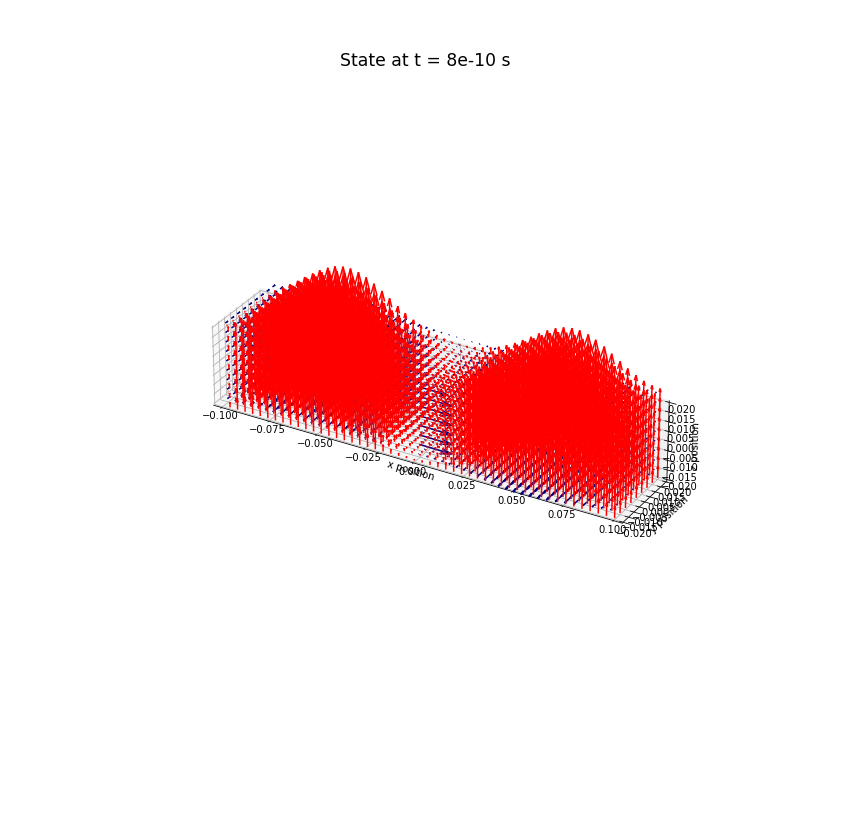

In [3]:
# plot state
index = 60
plot1 = space1.PlotState(space1.states[index], fields={'E': 1e-5, 'B': 1e3}, title=f'State at t = {space1.time[index]:.3} s', resolution=[50,5,5])
plt.savefig('plane-pulse-propagation-1-gpu.png')

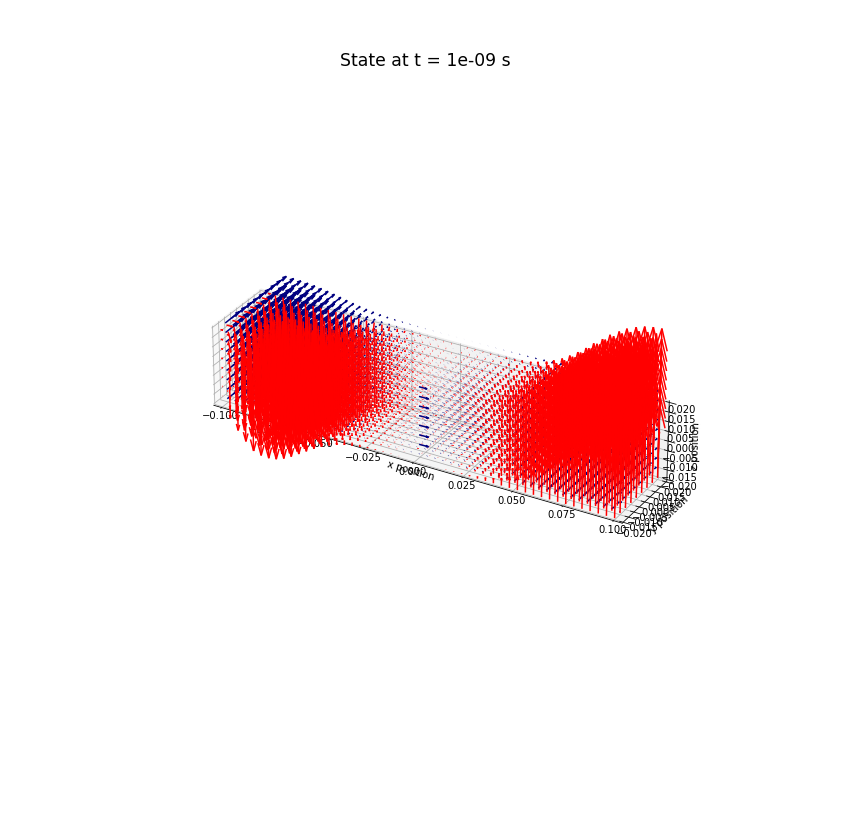

In [4]:
# plot state
index = 75
plot2 = space1.PlotState(space1.states[index], fields={'E': 1e-5, 'B': 1e3}, title=f'State at t = {space1.time[index]:.3} s', resolution=[50,5,5])
plt.savefig('plane-pulse-propagation-2-gpu.png')

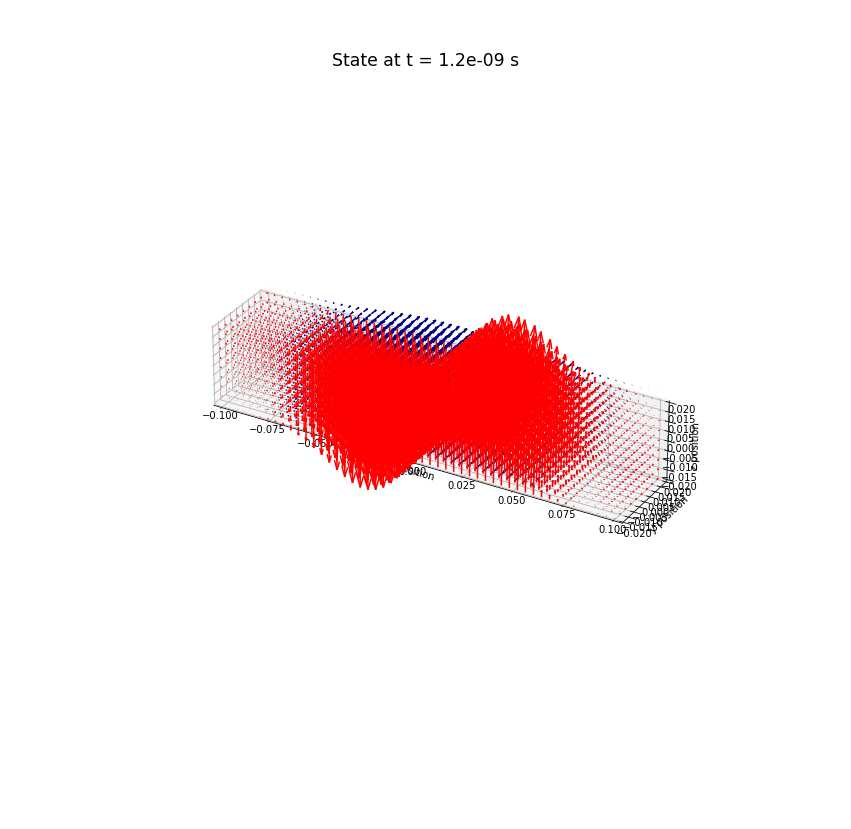

In [5]:
# plot state
index = 90
plot3 = space1.PlotState(space1.states[index], fields={'E': 1e-5, 'B': 1e3}, title=f'State at t = {space1.time[index]:.3} s', resolution=[50,5,5])
plt.savefig('plane-pulse-propagation-3-gpu.png')

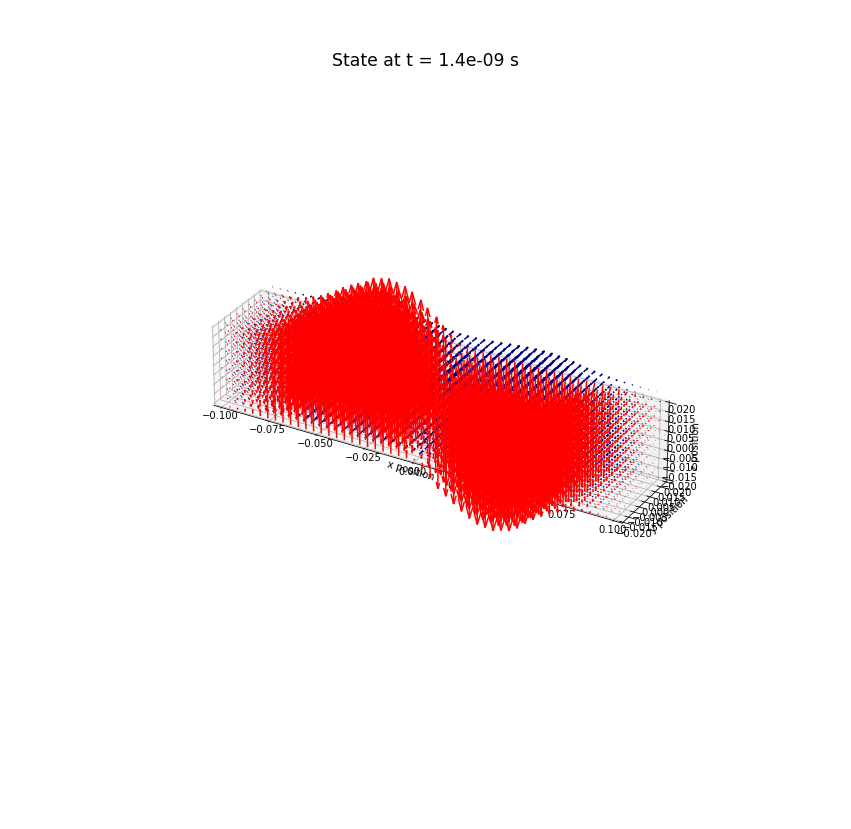

In [6]:
# plot state
index = 105
plot4 = space1.PlotState(space1.states[index], fields={'E': 1e-5, 'B': 1e3}, title=f'State at t = {space1.time[index]:.3} s', resolution=[50,5,5])
plt.savefig('plane-pulse-propagation-4-gpu.png')

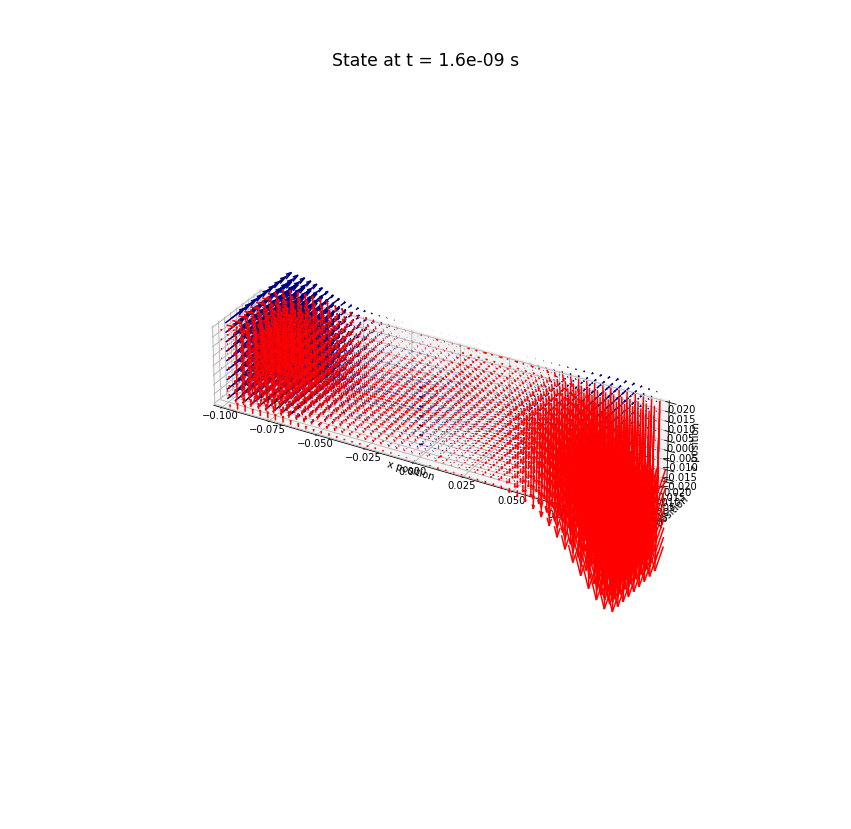

In [7]:
# plot state
index = 120
plot5 = space1.PlotState(space1.states[index], fields={'E': 1e-5, 'B': 1e3}, title=f'State at t = {space1.time[index]:.3} s', resolution=[50,5,5])
plt.savefig('plane-pulse-propagation-5-gpu.png')

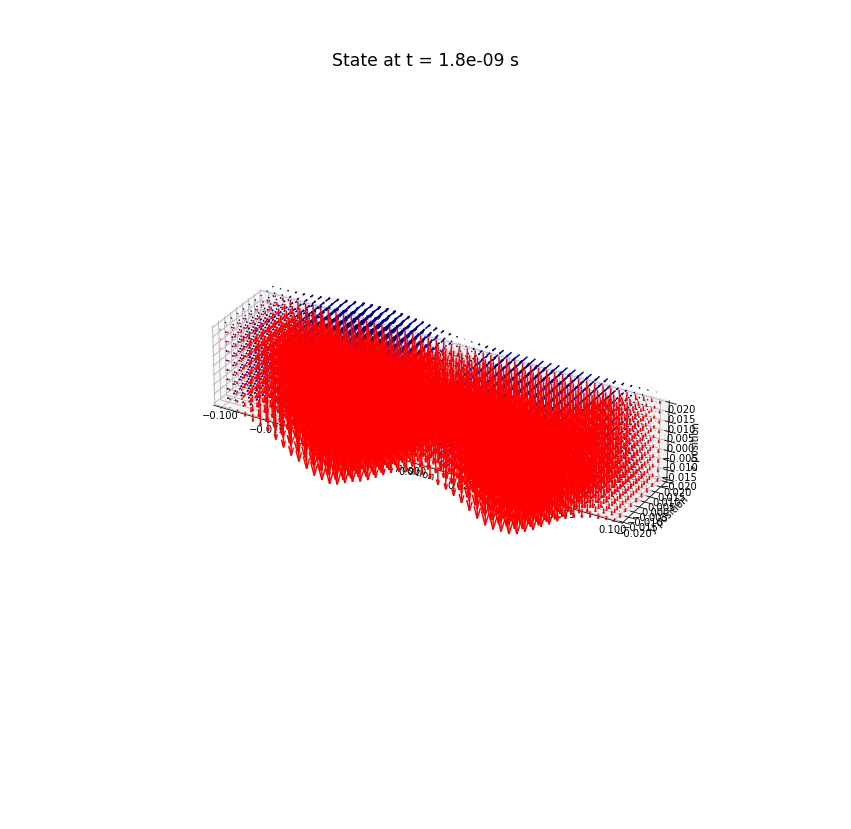

In [8]:
# plot state
index = 135
plot6 = space1.PlotState(space1.states[index], fields={'E': 1e-5, 'B': 1e3}, title=f'State at t = {space1.time[index]:.3} s', resolution=[50,5,5])
plt.savefig('plane-pulse-propagation-6-gpu.png')

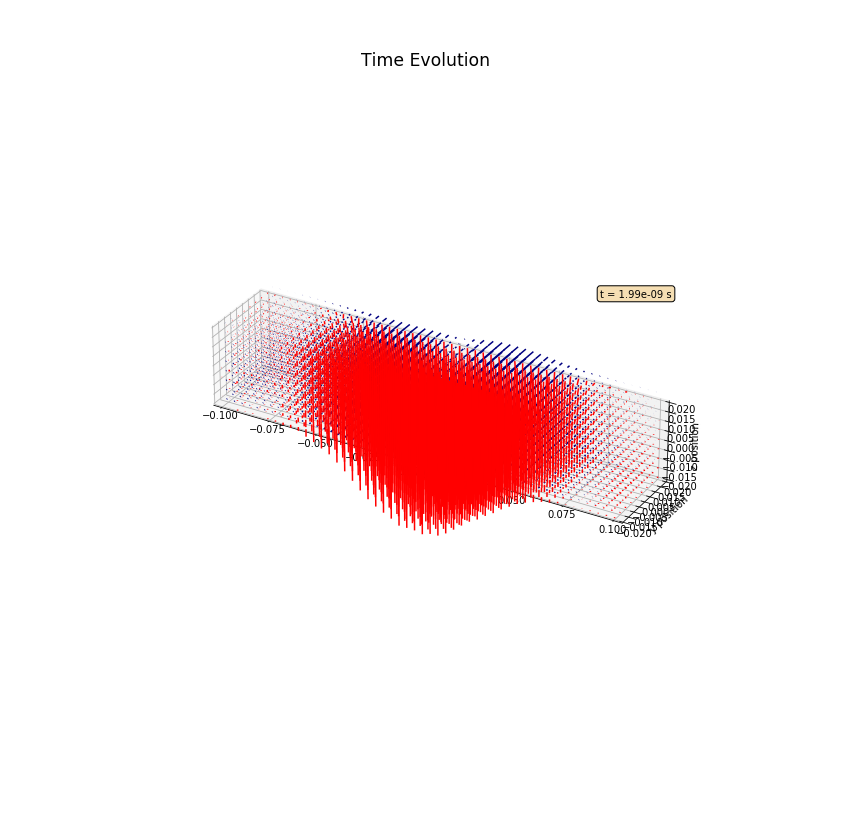

In [9]:
# animate
name = 'plane-pulse-propagation-gpu'
space1.AnimateEvolution(fields={'E': 1e-5, 'B': 1e3}, fps=30, resolution=[50,5,5], animname=name)
Image(url=f'{name}.gif')

## Reflection of Electromagentic Pulse on Other Material

In [10]:
import numpy as np
import math
from numba import cuda
from IPython.display import display, HTML, Image

@cuda.jit
def fupdater(shape, x, y, z, t, Ex, Ey, Ez):
    j, k = cuda.grid(2)
    if j < shape[1] and k < shape[2] and 1e10*t < 12: # leftmost
        Ex[0,j,k] = 0
        Ey[0,j,k] = 0
        Ez[0,j,k] = 2.5e3 * math.exp(-(1e10*t - 6)**2) # gaussian pulse

# update function
def f(state, system):
    thread_ct = (32, 32)
    block_ct_y = int(math.ceil(float(system.shape[1]) / thread_ct[0]))
    block_ct_z = int(math.ceil(float(system.shape[2]) / thread_ct[1]))
    block_ct = (block_ct_y, block_ct_z)
    fupdater[block_ct, thread_ct](system.shape, system.x, system.y, system.z, system.time[-1], state.Ex, state.Ey, state.Ez)

# modeller of iron
@cuda.jit
def iron_modeller(x, y, z, epsilon_x, epsilon_y, epsilon_z, mu_x, mu_y, mu_z, sigma_x, sigma_y, sigma_z):
    i, j, k = cuda.grid(3)
    if i < len(x) and j < len(y) and k < len(z) and x[i] > 0.05:
        epsilon_x[i,j,k] = 178.42
        epsilon_y[i,j,k] = 178.42
        epsilon_z[i,j,k] = 178.42
        mu_x[i,j,k] = 5e-3
        mu_y[i,j,k] = 5e-3
        mu_z[i,j,k] = 5e-3
        sigma_x[i,j,k] = 1e7
        sigma_y[i,j,k] = 1e7
        sigma_z[i,j,k] = 1e7

# Visualizer of iron
def iron_visual(fig, ax):
    color = 'black'
    ax.plot([0.05,0.05,0.05,0.05,0.05], [-0.02,-0.02,0.02,0.02,-0.02], [-0.02,0.02,0.02,-0.02,-0.02], color=color)

iron = EMModel('iron', iron_modeller, iron_visual)
space2 = EMSystem(0.002, 0.005, 0.005, [-0.1,0.1], [-0.02,0.02], [-0.02,0.02], models=[iron], init=f)
space2.Update((1.0e-11)/6, 2e-9, 150, f, space2)

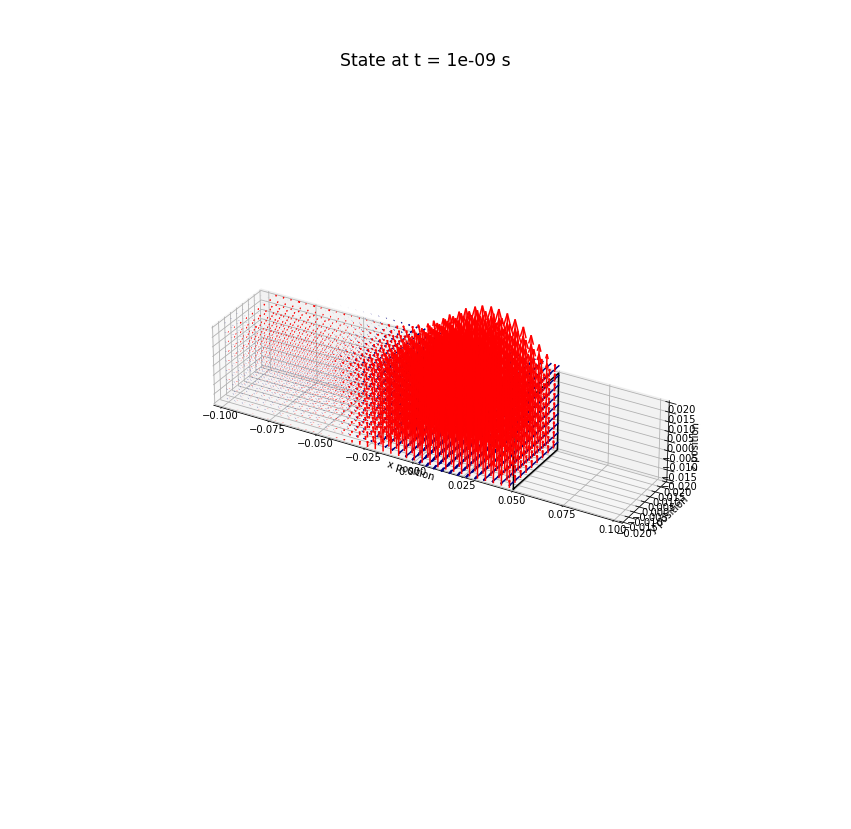

In [11]:
# plot state
index = 75
plot = space2.PlotState(space2.states[index], fields={'E': 1e-5, 'B': 1e3}, title=f'State at t = {space2.time[index]:.3} s', resolution=[50,5,5])
plt.savefig('plane-pulse-reflection-1-gpu.png')

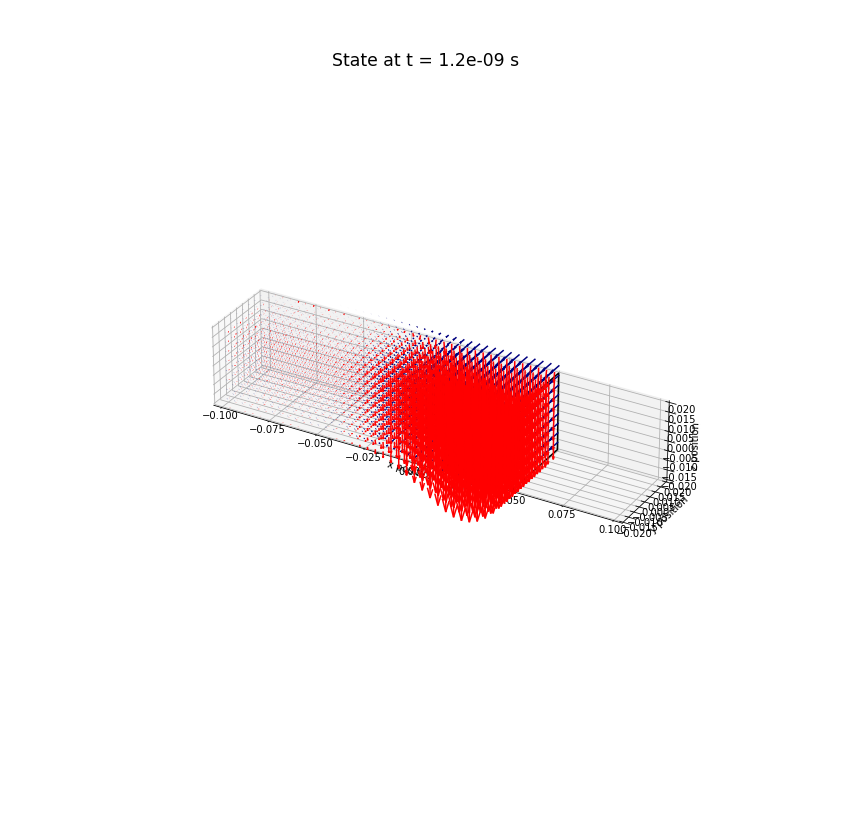

In [12]:
# plot state
index = 90
plot = space2.PlotState(space2.states[index], fields={'E': 1e-5, 'B': 1e3}, title=f'State at t = {space2.time[index]:.3} s', resolution=[50,5,5])
plt.savefig('plane-pulse-reflection-2-gpu.png')

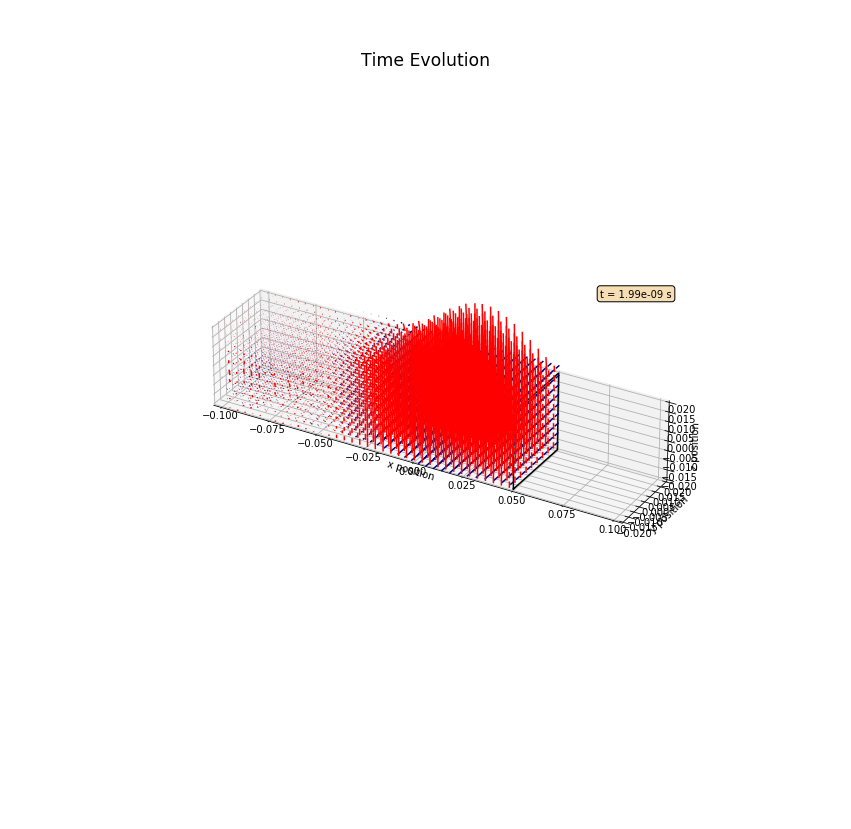

In [13]:
# animate
name = 'plane-pulse-reflection-gpu'
space2.AnimateEvolution(fields={'E': 1e-5, 'B': 1e3}, fps=30, resolution=[50,5,5], animname=name)
Image(url=f'{name}.gif')

### Propagation of a Point Electromagnetic Pulse

In [14]:
import numpy as np
import math
from numba import cuda
from IPython.display import display, HTML, Image

def fupdater(shape, x, y, z, t, Ex, Ey, Ez):
    Ex[20,20,20] = 0
    Ey[20,20,20] = 0
    Ez[20,20,20] = 2.5e3 * math.exp(-(1e10*t - 6)**2) # gaussian pulse

# update function
def f(state, system):
    fupdater(system.shape, system.x, system.y, system.z, system.time[-1], state.Ex, state.Ey, state.Ez)

space3 = EMSystem(0.005, 0.005, 0.005, [-0.1,0.1], [-0.1,0.1], [-0.1,0.1], init=f)
space3.Update((1.0e-11)/6, 2e-9, 150, f, space3)

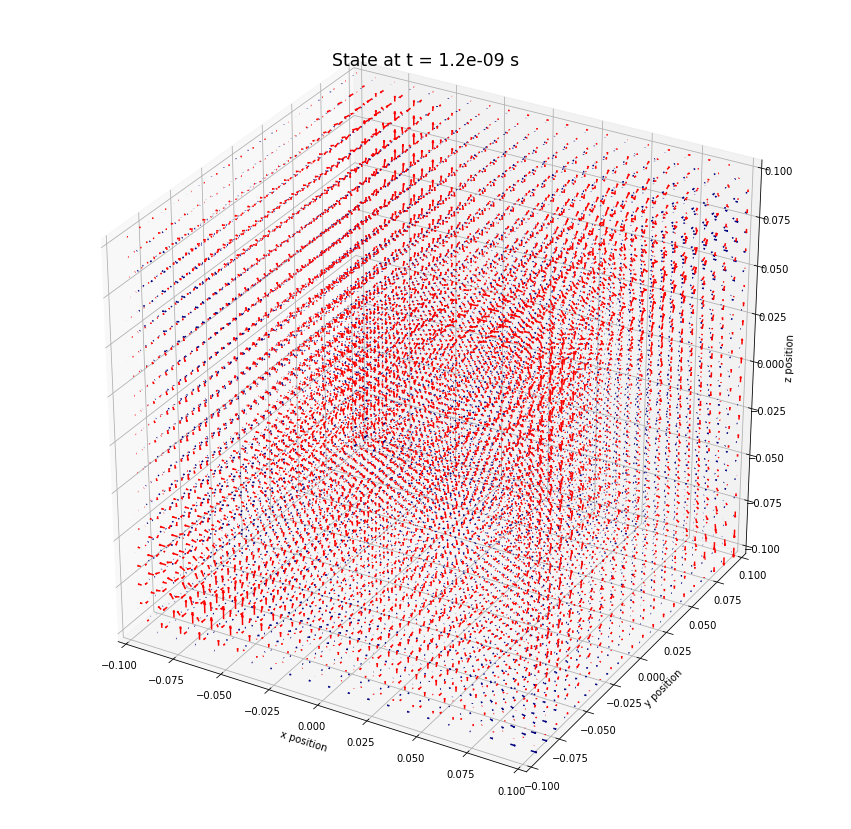

In [15]:
# plot state
index = 90
plot = space3.PlotState(space3.states[index], fields={'E': 1e-3, 'B': 1e5}, title=f'State at t = {space3.time[index]:.3} s', resolution=[20,20,20])
plt.savefig('point-pulse-propagation-gpu.png')

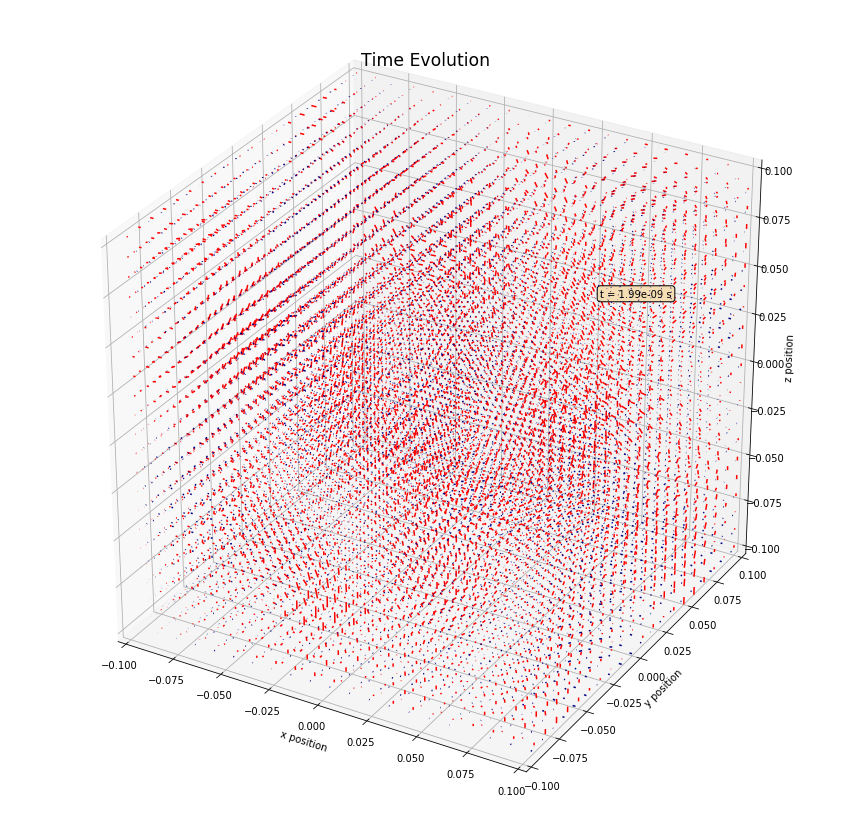

In [16]:
# animate
name = 'point-pulse-propagation-gpu'
space3.AnimateEvolution(fields={'E': 1e-3, 'B': 1e5}, fps=30, resolution=[20,20,20], animname=name)
Image(url=f'{name}.gif')